In [32]:

import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# quandl
import quandl

# reproducibility
np.random.seed(34)

# formatting
sns.set()
pd.options.display.float_format = '{:,.2f}'.format

In [2]:

sp_pe_data = quandl.get(
    "MULTPL/SP500_PE_RATIO_MONTH", 
    authtoken="X9qdzqsxLuF-a_v7G3bm",
    returns="numpy"
)

In [3]:
df_pe = pd.DataFrame(sp_pe_data)
df_pe.head()

,Date,Value
0,1871-01-01,11.10
1,1871-02-01,11.25
2,1871-03-01,11.52
3,1871-04-01,11.85
4,1871-05-01,12.15


In [4]:
df_pe.tail()

,Date,Value
1820,2021-06-30,45.65
1821,2021-07-01,33.99
1822,2021-08-01,34.71
1823,2021-08-31,35.28
1824,2021-09-01,35.29


In [5]:
df_pe.tail(15)

,Date,Value
1810,2020-12-01,39.26
1811,2020-12-31,37.85
1812,2021-01-01,35.96
1813,2021-02-01,33.24
1814,2021-03-01,30.50
1815,2021-03-31,40.45
1816,2021-04-01,32.30
1817,2021-04-30,42.57
1818,2021-05-01,32.51
1819,2021-06-01,33.06


In [6]:
df_pe = df_pe.drop([1773, 1776, 1778])

df_pe.tail()

,Date,Value
1820,2021-06-30,45.65
1821,2021-07-01,33.99
1822,2021-08-01,34.71
1823,2021-08-31,35.28
1824,2021-09-01,35.29


In [7]:
#he average PE of the past 50 years.
AVG_PE = np.mean(df_pe.tail(600).Value)
AVG_PE

20.2702

In [8]:
df_pe_50 = df_pe.tail(600)
df_pe_50.tail()

,Date,Value
1820,2021-06-30,45.65
1821,2021-07-01,33.99
1822,2021-08-01,34.71
1823,2021-08-31,35.28
1824,2021-09-01,35.29


In [9]:
df_pe_50.mean()

Value   20.27
dtype: float64

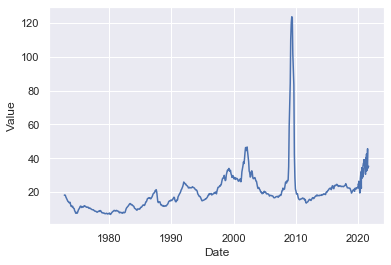

In [10]:
sns.lineplot(data=df_pe_50, x='Date', y='Value')

In [11]:
#the S&P 500 prices
sp_price_data = quandl.get(
    "MULTPL/SP500_INFLADJ_MONTH", 
    authtoken="X9qdzqsxLuF-a_v7G3bm",
    returns="numpy"
)

In [12]:
df_price = pd.DataFrame(sp_price_data)
df_price.tail(20)

,Date,Value
1805,2020-09-01,"3,530.03"
1806,2020-09-30,"3,363.00"
1807,2020-10-01,"3,584.33"
1808,2020-11-01,"3,723.20"
1809,2020-11-30,"3,621.63"
1810,2020-12-01,"3,873.06"
1811,2020-12-31,"3,756.07"
1812,2021-01-01,"3,959.39"
1813,2021-02-01,"4,030.92"
1814,2021-03-01,"4,030.48"


In [13]:
df_price = df_price.drop([1773, 1776, 1778])

In [14]:
df_price_50 = df_price.tail(600)
df_price_50.tail()

,Date,Value
1820,2021-06-30,"4,297.50"
1821,2021-07-01,"4,358.13"
1822,2021-08-01,"4,450.37"
1823,2021-08-31,"4,522.68"
1824,2021-09-01,"4,524.09"


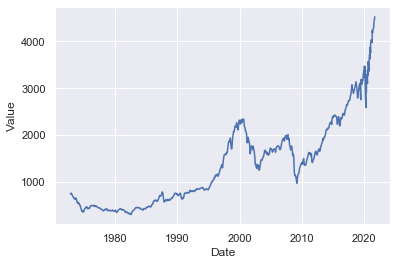

In [15]:
sns.lineplot(data=df_price_50, x='Date', y='Value')

In [16]:
#combine the DataFrames.
df_50 = pd.merge(df_price_50, df_pe_50, on='Date', how='inner')
df_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     600 non-null    datetime64[ns]
 1   Value_x  600 non-null    float64       
 2   Value_y  600 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.8 KB


In [17]:
df_50.head()

,Date,Value_x,Value_y
0,1972-11-01,741.10,18.19
1,1972-12-01,754.77,18.30
2,1973-01-01,758.77,18.09
3,1973-02-01,726.74,17.11
4,1973-03-01,708.67,16.53


In [18]:
df_50.columns=['date', 'price', 'pe']

In [19]:
df_50.head()

,date,price,pe
0,1972-11-01,741.10,18.19
1,1972-12-01,754.77,18.30
2,1973-01-01,758.77,18.09
3,1973-02-01,726.74,17.11
4,1973-03-01,708.67,16.53


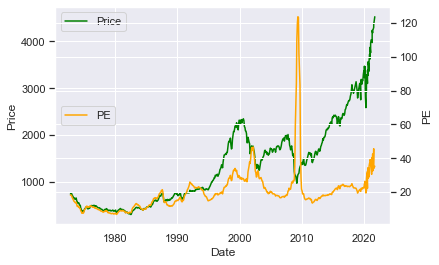

In [20]:
ax1 = sns.lineplot(data=df_50, x='date', y='price', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2 = plt.twinx()
ax2 = sns.lineplot(data=df_50, x='date', y='pe', color='orange')
ax2.set_ylabel('PE')
ax1.legend(labels=["Price"], loc = 'upper left')
ax2.legend(labels=["PE"], loc = 'center left')

In [21]:
# compared to the standard PE ratio.
sp_10pe_data = quandl.get(
    "MULTPL/SHILLER_PE_RATIO_MONTH",                     
    authtoken="X9qdzqsxLuF-a_v7G3bm",
    returns="numpy"
)

In [22]:
df_10 = pd.DataFrame(sp_10pe_data)
df_10.tail()

,Date,Value
1819,2021-06-30,38.11
1820,2021-07-01,37.68
1821,2021-08-01,38.44
1822,2021-08-31,39.06
1823,2021-09-01,39.07


In [23]:
df_10 = df_10.drop([1772, 1775, 1777])

In [24]:
df_10.tail(20)

,Date,Value
1804,2020-09-01,30.84
1805,2020-09-30,30.89
1806,2020-10-01,31.28
1807,2020-11-01,32.47
1808,2020-11-30,33.08
1809,2020-12-01,33.77
1810,2020-12-31,34.19
1811,2021-01-01,34.51
1812,2021-02-01,35.10
1813,2021-03-01,35.04


In [26]:
df_10pe_50 = df_10.tail(600)
df_10pe_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1221 to 1823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    600 non-null    datetime64[ns]
 1   Value   600 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.1 KB


In [27]:
df_10pe_50.columns=['date', 'shiller_pe']
df_10pe_50.tail()

,date,shiller_pe
1819,2021-06-30,38.11
1820,2021-07-01,37.68
1821,2021-08-01,38.44
1822,2021-08-31,39.06
1823,2021-09-01,39.07


In [28]:
#combine the Shiller PE data into the main DataFrame
df_50 = pd.merge(df_50, df_10pe_50, on='date', how='inner')
df_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        600 non-null    datetime64[ns]
 1   price       600 non-null    float64       
 2   pe          600 non-null    float64       
 3   shiller_pe  600 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.4 KB


In [29]:
df_50.tail()

,date,price,pe,shiller_pe
595,2021-06-30,"4,297.50",45.65,38.11
596,2021-07-01,"4,358.13",33.99,37.68
597,2021-08-01,"4,450.37",34.71,38.44
598,2021-08-31,"4,522.68",35.28,39.06
599,2021-09-01,"4,524.09",35.29,39.07


In [30]:
#df_50 = df_50.set_index('date')
#df_50.head()

<ipython-input-31-6cd6e411c0c0>:16: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  ax3.legend(labels=["Shiller PE"], loc = 'bottom left')


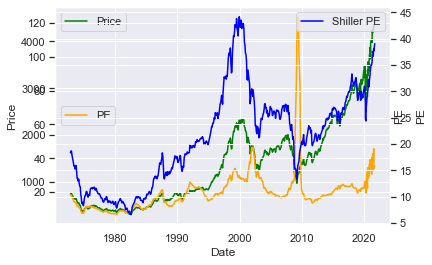

In [31]:
from matplotlib import rcParams

ax1 = sns.lineplot(data=df_50, x='date', y='price', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(labels=["Price"], loc = 'upper left')

ax2 = plt.twinx()
ax2 = sns.lineplot(data=df_50, x='date', y='pe', color='orange')
ax2.set_ylabel('PE')
ax2.legend(labels=["PE"], loc = 'center left')

ax3 = plt.twinx()
ax3 = sns.lineplot(data=df_50, x='date', y='shiller_pe', color='blue')
ax3.set_ylabel('PE')
ax3.legend(labels=["Shiller PE"], loc = 'bottom left')

rcParams['figure.figsize'] = 20,10
